### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

# Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv("~/Downloads/fraudTest.csv")
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
dataset.shape

(555719, 23)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## Missing value

In [6]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Duplicate Rows

In [7]:
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
555714    False
555715    False
555716    False
555717    False
555718    False
Length: 555719, dtype: bool

In [8]:
dataset.duplicated().value_counts()

False    555719
dtype: int64

## Skewness Of Features

In [9]:
dataset.skew()

Unnamed: 0   -1.206865e-15
cc_num        2.849204e+00
amt           3.713408e+01
zip           7.724601e-02
lat          -2.060376e-01
long         -1.139416e+00
city_pop      5.583415e+00
unix_time    -7.740538e-02
merch_lat    -2.026261e-01
merch_long   -1.136810e+00
is_fraud      1.600255e+01
dtype: float64

# Univariate Analysis

In [10]:
num = ['amt', 'zip', 'lat', 'long', 'city_pop','merch_lat', 'merch_long']
obj = ['category','gender', 'state']

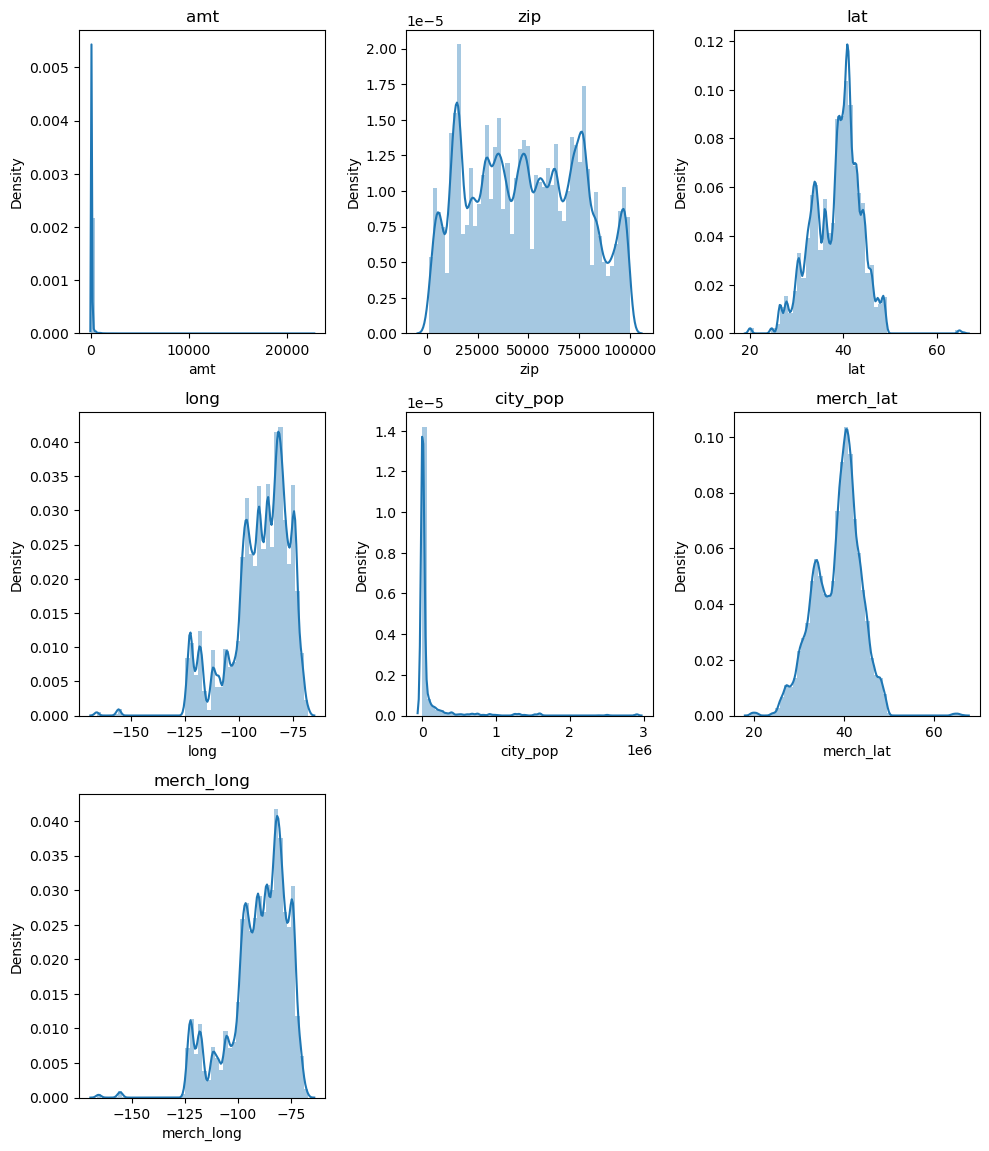

In [11]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.distplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

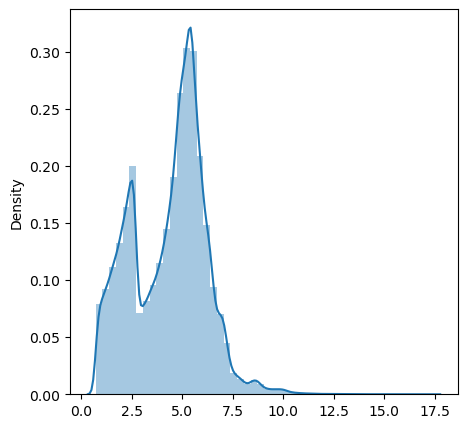

In [12]:
plt.rcParams['figure.figsize']=[5,5]

sns.distplot(stats.yeojohnson(dataset.amt)[0])

In [13]:
stats.skew(stats.yeojohnson(dataset.amt)[0])

-0.014674317415272704

<AxesSubplot:ylabel='Density'>

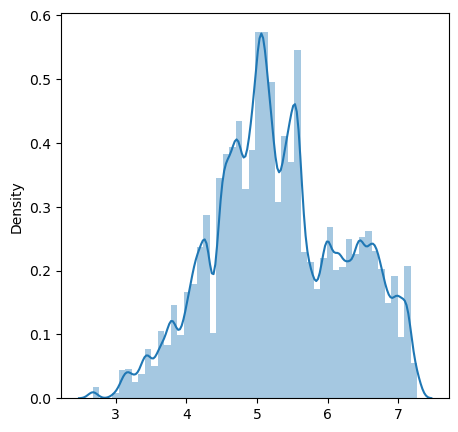

In [14]:
plt.rcParams['figure.figsize']=[5,5]

sns.distplot(stats.yeojohnson(dataset.city_pop)[0])

In [15]:
stats.skew(stats.yeojohnson(dataset.city_pop)[0])

0.05867571815498856

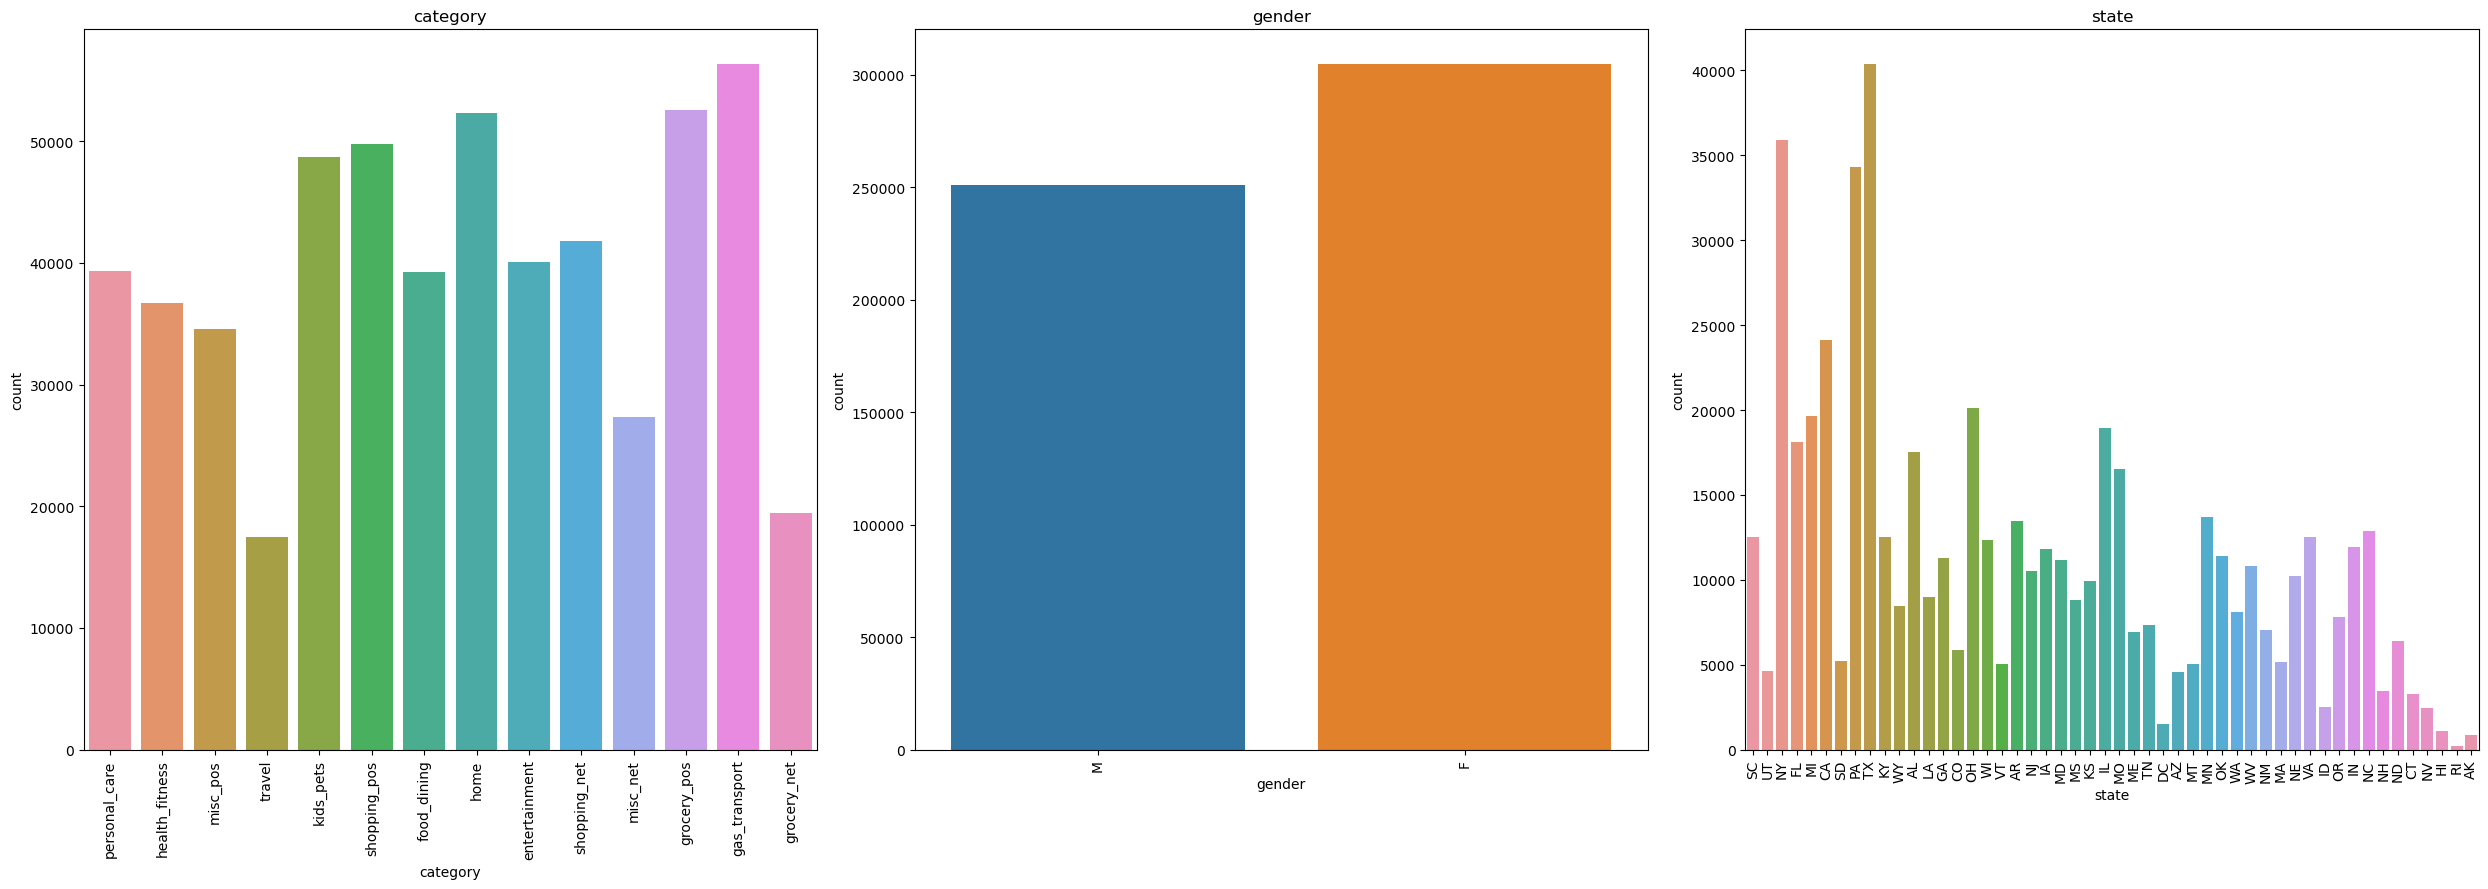

In [16]:
plt.rcParams['figure.figsize']=[25,25]
row=3
column=3
iterator=1

for i in obj:
    plt.subplot(row,column,iterator)
    sns.countplot(dataset.loc[:,i])
    iterator=1+iterator
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Bivariate Analysis

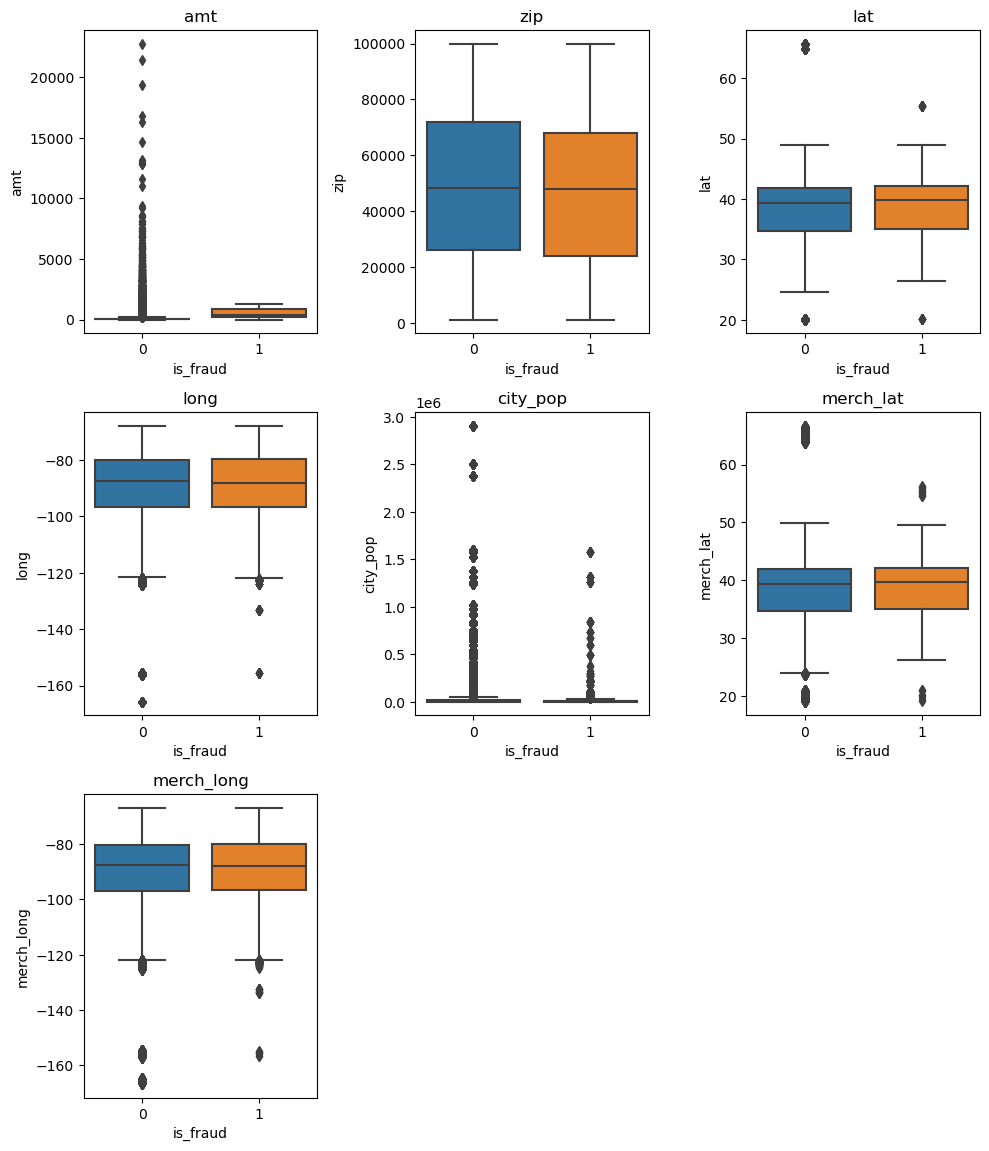

In [17]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

## Outliers Treatment

In [18]:
for i in num:
    
    q1=dataset[i].quantile(0.25)
    q3=dataset[i].quantile(0.75)
    iqr=q3-q1

    upper_lim=q3+1.5*iqr
    lower_lim=q1-1.5*iqr
    dataset.loc[dataset[i]>upper_lim,i]=upper_lim
    dataset.loc[dataset[i]<lower_lim,i]=lower_lim

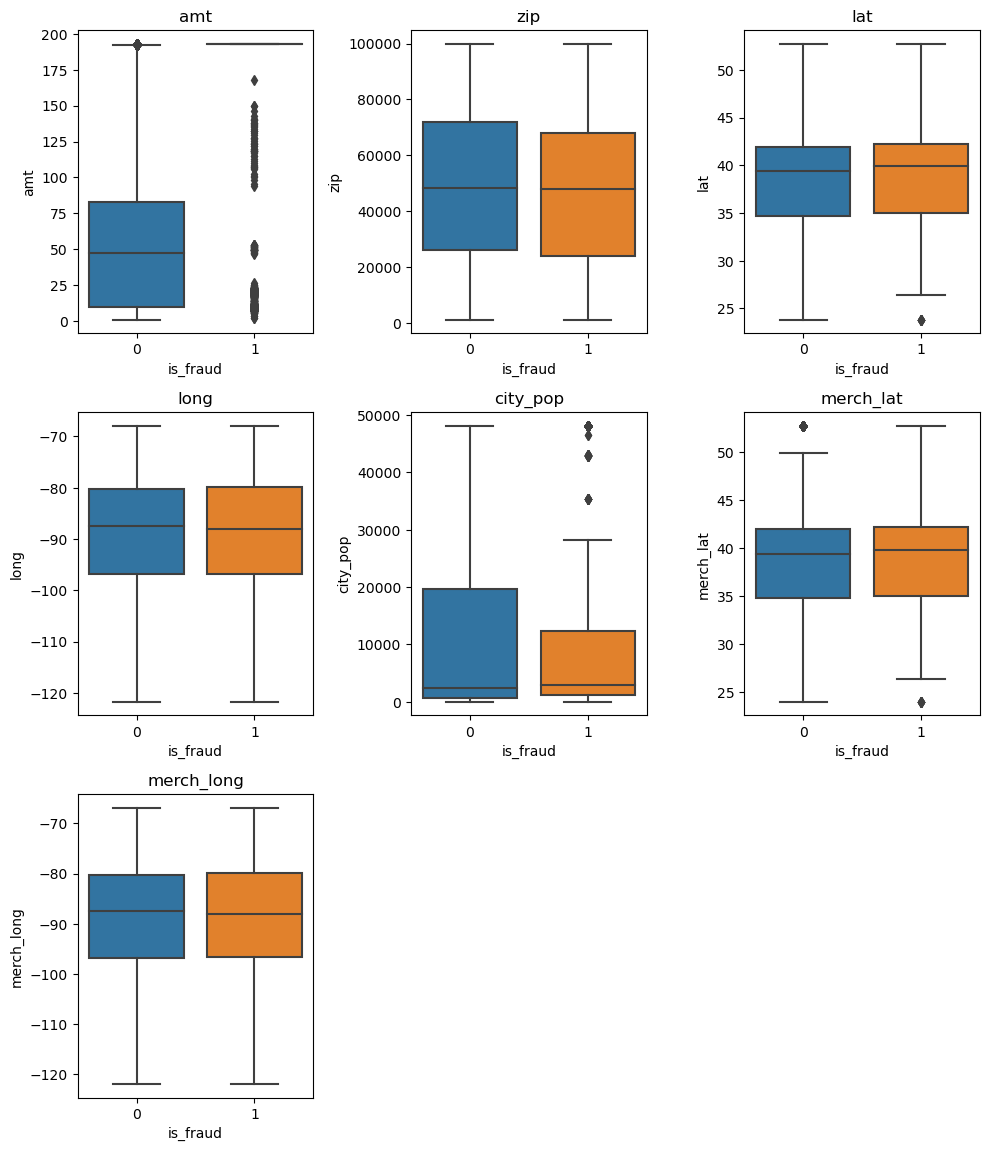

In [19]:
plt.rcParams['figure.figsize']=[10,15]
row=4
column=3
iterator=1

for i in num:
    plt.subplot(row,column,iterator)
    sns.boxplot(y=dataset.loc[:,i],x=dataset.loc[:,'is_fraud'])
    iterator=1+iterator
    plt.title(i)
plt.tight_layout()
plt.show()

# imbalance in data

In [20]:
fraud = dataset[dataset['is_fraud'] == 1]
valid = dataset[dataset['is_fraud'] == 0]

In [21]:
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)

0.003874820710510248


In [22]:
print('Fraud Cases: {}'.format(len(dataset[dataset['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['is_fraud'] == 0])))

Fraud Cases: 2145
Valid Transactions: 553574


In [23]:
dataset.amt.describe()

count    555719.000000
mean         57.607360
std          52.833274
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max         193.080000
Name: amt, dtype: float64

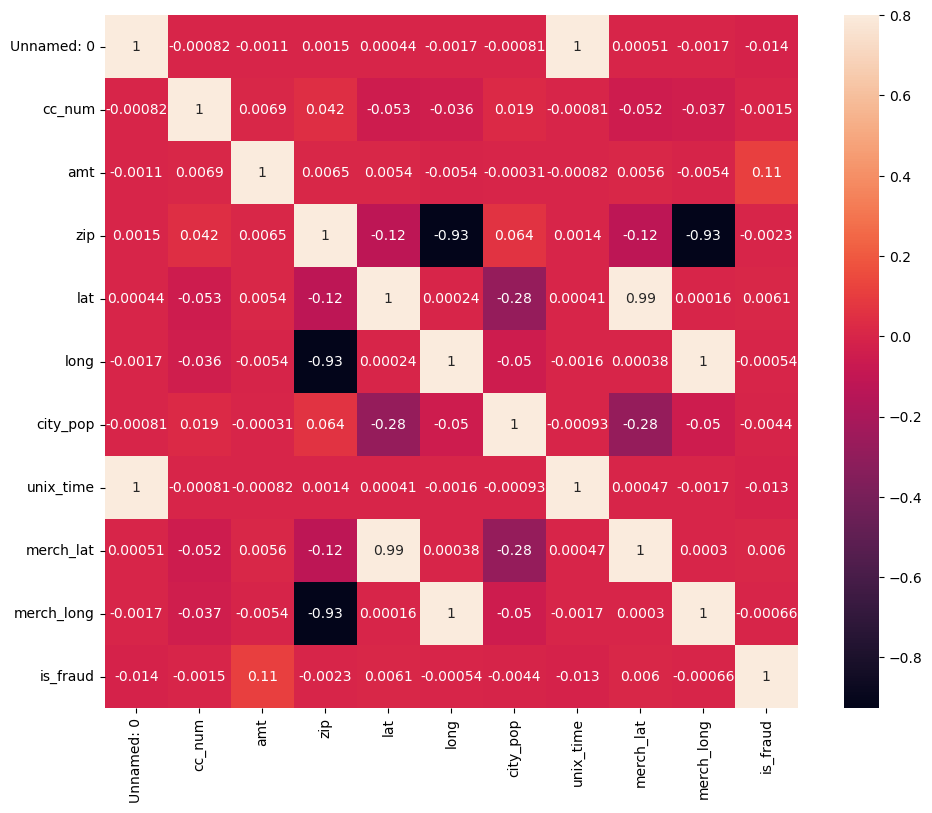

In [24]:
plt.figure(figsize = (12, 9))
sns.heatmap(dataset.corr(), vmax = .8, square = True,annot=True)
plt.show()

We will select important columns for our study

In [25]:
princ_col = ['category', 'amt', 'gender', 'city', 'city_pop', 'dob', 'cc_num', 'zip', 'merch_lat', 'lat', 'long', 'merch_long', 'is_fraud']
data = dataset[princ_col]
data.head()

,category,amt,gender,city,city_pop,dob,cc_num,zip,merch_lat,lat,long,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,48101,1968-03-19,2291163933867244,29209.0,33.986391,33.9659,-80.9355,-81.200714,0
1,personal_care,29.84,F,Altonah,302,1990-01-17,3573030041201292,84002.0,39.450498,40.3207,-110.4360,-109.960431,0
2,health_fitness,41.28,F,Bellmore,34496,1970-10-21,3598215285024754,11710.0,40.495810,40.6729,-73.5365,-74.196111,0
3,misc_pos,60.05,M,Titusville,48101,1987-07-25,3591919803438423,32780.0,28.812398,28.5697,-80.8191,-80.883061,0
4,travel,3.19,M,Falmouth,1126,1955-07-06,3526826139003047,49632.0,44.959148,44.2529,-85.0170,-85.884734,0


We want only the year of birth in dob column.

In [26]:
year = []
for i in range(len(data)):
    year.append(str(data['dob'][i]).split('-')[0])
    
# drop column dob
data = data.drop(['dob'], axis=1)
data.insert(5, "Byear", year, True)

# change type of columns
data['Byear'] = data['Byear'].astype('int')
data['amt'] = data['amt'].astype('float')
data.head()

,category,amt,gender,city,city_pop,Byear,cc_num,zip,merch_lat,lat,long,merch_long,is_fraud
0,personal_care,2.86,M,Columbia,48101,1968,2291163933867244,29209.0,33.986391,33.9659,-80.9355,-81.200714,0
1,personal_care,29.84,F,Altonah,302,1990,3573030041201292,84002.0,39.450498,40.3207,-110.4360,-109.960431,0
2,health_fitness,41.28,F,Bellmore,34496,1970,3598215285024754,11710.0,40.495810,40.6729,-73.5365,-74.196111,0
3,misc_pos,60.05,M,Titusville,48101,1987,3591919803438423,32780.0,28.812398,28.5697,-80.8191,-80.883061,0
4,travel,3.19,M,Falmouth,1126,1955,3526826139003047,49632.0,44.959148,44.2529,-85.0170,-85.884734,0


In [27]:
data.dtypes

category       object
amt           float64
gender         object
city           object
city_pop        int64
Byear           int32
cc_num          int64
zip           float64
merch_lat     float64
lat           float64
long          float64
merch_long    float64
is_fraud        int64
dtype: object

### Encoding Categorical data

Label Encoding the "Gender" column:
- Female = 0
- Male = 1

In [28]:
# Gender
#le = LabelEncoder()
#X[:, 2] = le.fit_transform(X[:, 2]) # Column 3 (Gender)
#X

Label Encoding the "Cities" column:

In [29]:
# Cities
#X[:, 3] = le.fit_transform(X[:, 3]) # Column 4 (City)
#X

In [30]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [31]:

import category_encoders as ce
tenc=ce.TargetEncoder() 
df_city=tenc.fit_transform(data['city'],data['is_fraud'])

df_new = df_city.join(data.drop('city',axis = 1))
df_new

,city,category,amt,gender,city_pop,Byear,cc_num,zip,merch_lat,lat,long,merch_long,is_fraud
0,0.000000,personal_care,2.86,M,48101,1968,2291163933867244,29209.0,33.986391,33.9659,-80.9355,-81.200714,0
1,0.000000,personal_care,29.84,F,302,1990,3573030041201292,84002.0,39.450498,40.3207,-110.4360,-109.960431,0
2,0.000000,health_fitness,41.28,F,34496,1970,3598215285024754,11710.0,40.495810,40.6729,-73.5365,-74.196111,0
3,0.015083,misc_pos,60.05,M,48101,1987,3591919803438423,32780.0,28.812398,28.5697,-80.8191,-80.883061,0
4,0.000000,travel,3.19,M,1126,1955,3526826139003047,49632.0,44.959148,44.2529,-85.0170,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.017516,health_fitness,43.77,M,519,1966,30560609640617,63453.0,39.946837,40.4931,-91.8912,-91.333331,0
555715,0.000000,kids_pets,111.84,M,28739,1999,3556613125071656,77566.0,29.661049,29.0393,-95.4401,-96.186633,0
555716,0.000000,kids_pets,86.88,F,3684,1981,6011724471098086,99323.0,46.658340,46.1966,-118.9017,-119.715054,0
555717,0.000000,travel,7.99,M,129,1965,4079773899158,83643.0,44.470525,44.6255,-116.4493,-117.080888,0


In [32]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_new['gender']= label_encoder.fit_transform(df_new['gender'])
  
df_new['gender'].unique()

array([1, 0])

In [33]:
df_new

,city,category,amt,gender,city_pop,Byear,cc_num,zip,merch_lat,lat,long,merch_long,is_fraud
0,0.000000,personal_care,2.86,1,48101,1968,2291163933867244,29209.0,33.986391,33.9659,-80.9355,-81.200714,0
1,0.000000,personal_care,29.84,0,302,1990,3573030041201292,84002.0,39.450498,40.3207,-110.4360,-109.960431,0
2,0.000000,health_fitness,41.28,0,34496,1970,3598215285024754,11710.0,40.495810,40.6729,-73.5365,-74.196111,0
3,0.015083,misc_pos,60.05,1,48101,1987,3591919803438423,32780.0,28.812398,28.5697,-80.8191,-80.883061,0
4,0.000000,travel,3.19,1,1126,1955,3526826139003047,49632.0,44.959148,44.2529,-85.0170,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.017516,health_fitness,43.77,1,519,1966,30560609640617,63453.0,39.946837,40.4931,-91.8912,-91.333331,0
555715,0.000000,kids_pets,111.84,1,28739,1999,3556613125071656,77566.0,29.661049,29.0393,-95.4401,-96.186633,0
555716,0.000000,kids_pets,86.88,0,3684,1981,6011724471098086,99323.0,46.658340,46.1966,-118.9017,-119.715054,0
555717,0.000000,travel,7.99,1,129,1965,4079773899158,83643.0,44.470525,44.6255,-116.4493,-117.080888,0


In [34]:
df_new.category.unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

One Hot Encoding the "Category" column

In [35]:
df_city=tenc.fit_transform(df_new['category'],df_new['is_fraud'])

df = df_city.join(df_new.drop('category',axis = 1))
df

,category,city,amt,gender,city_pop,Byear,cc_num,zip,merch_lat,lat,long,merch_long,is_fraud
0,0.001780,0.000000,2.86,1,48101,1968,2291163933867244,29209.0,33.986391,33.9659,-80.9355,-81.200714,0
1,0.001780,0.000000,29.84,0,302,1990,3573030041201292,84002.0,39.450498,40.3207,-110.4360,-109.960431,0
2,0.001418,0.000000,41.28,0,34496,1970,3598215285024754,11710.0,40.495810,40.6729,-73.5365,-74.196111,0
3,0.002082,0.015083,60.05,1,48101,1987,3591919803438423,32780.0,28.812398,28.5697,-80.8191,-80.883061,0
4,0.002292,0.000000,3.19,1,1126,1955,3526826139003047,49632.0,44.959148,44.2529,-85.0170,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.001418,0.017516,43.77,1,519,1966,30560609640617,63453.0,39.946837,40.4931,-91.8912,-91.333331,0
555715,0.001335,0.000000,111.84,1,28739,1999,3556613125071656,77566.0,29.661049,29.0393,-95.4401,-96.186633,0
555716,0.001335,0.000000,86.88,0,3684,1981,6011724471098086,99323.0,46.658340,46.1966,-118.9017,-119.715054,0
555717,0.002292,0.000000,7.99,1,129,1965,4079773899158,83643.0,44.470525,44.6255,-116.4493,-117.080888,0


In [36]:
df.select_dtypes(include=object).columns
# none

Index([], dtype='object')

In [37]:
df.select_dtypes(include=np.number).columns

Index(['category', 'city', 'amt', 'gender', 'city_pop', 'Byear', 'cc_num',
       'zip', 'merch_lat', 'lat', 'long', 'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
X = df.iloc[:, 0:12].values
y = df.iloc[:, -1].values
print("X Data\n",X)
print("\ny Data\n",y)

X Data
 [[ 1.77994762e-03  0.00000000e+00  2.86000000e+00 ...  3.39659000e+01
  -8.09355000e+01 -8.12007140e+01]
 [ 1.77994762e-03  0.00000000e+00  2.98400000e+01 ...  4.03207000e+01
  -1.10436000e+02 -1.09960431e+02]
 [ 1.41789824e-03  0.00000000e+00  4.12800000e+01 ...  4.06729000e+01
  -7.35365000e+01 -7.41961110e+01]
 ...
 [ 1.33492155e-03  0.00000000e+00  8.68800000e+01 ...  4.61966000e+01
  -1.18901700e+02 -1.19715054e+02]
 [ 2.29239498e-03  0.00000000e+00  7.99000000e+00 ...  4.46255000e+01
  -1.16449300e+02 -1.17080888e+02]
 [ 1.47117495e-03  9.17431193e-03  3.81300000e+01 ...  3.56665000e+01
  -9.74798000e+01 -9.70363720e+01]]

y Data
 [0 0 0 ... 0 0 0]


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [40]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(444575, 12) (444575,) (111144, 12) (111144,)


In [41]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

In [42]:
np.asarray((unique_elements, counts_elements))

array([[     0,      1],
       [442871,   1704]], dtype=int64)

In [43]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.transform(x_test)

In [44]:
from imblearn.over_sampling import SMOTE 

In [45]:
over_samp = SMOTE()

In [46]:
x_train_os,y_train_os = over_samp.fit_resample(x_train,y_train)

In [47]:
print(x_train_os.shape,y_train_os.shape,x_test.shape,y_test.shape)

(885742, 12) (885742,) (111144, 12) (111144,)


In [48]:
unique_elements, counts_elements = np.unique(y_train_os, return_counts=True)

In [49]:
np.asarray((unique_elements, counts_elements))

array([[     0,      1],
       [442871, 442871]], dtype=int64)

In [50]:
import statsmodels.api as sma
sma.add_constant(X)

array([[ 1.00000000e+00,  1.77994762e-03,  0.00000000e+00, ...,
         3.39659000e+01, -8.09355000e+01, -8.12007140e+01],
       [ 1.00000000e+00,  1.77994762e-03,  0.00000000e+00, ...,
         4.03207000e+01, -1.10436000e+02, -1.09960431e+02],
       [ 1.00000000e+00,  1.41789824e-03,  0.00000000e+00, ...,
         4.06729000e+01, -7.35365000e+01, -7.41961110e+01],
       ...,
       [ 1.00000000e+00,  1.33492155e-03,  0.00000000e+00, ...,
         4.61966000e+01, -1.18901700e+02, -1.19715054e+02],
       [ 1.00000000e+00,  2.29239498e-03,  0.00000000e+00, ...,
         4.46255000e+01, -1.16449300e+02, -1.17080888e+02],
       [ 1.00000000e+00,  1.47117495e-03,  9.17431193e-03, ...,
         3.56665000e+01, -9.74798000e+01, -9.70363720e+01]])

# Making the predictions and evaluating the model

### Predicting the result of a single observation
Using our ANN model to predict if the customer with the following informations will leave the bank: 

- category: health_fitness (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
- amt: 20.00 
- Gender: F (0)
- City: Columbia (157)
- Byear: 30 (1992)

**So, is this customer a frauder?**

### X[0]

## Making the Confusion Matrix
Result:

  [ Correct predictions Stay / Incorrect predictions Leave ]

  [ Incorrect predictions Stay / Correct predictions Leave ]

- Hit percentage of results

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logmodel = sma.Logit(y_train_os, x_train_os).fit()
logmodel.summary()

Optimization terminated successfully.
         Current function value: 0.414300
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               885742
Model:                          Logit   Df Residuals:                   885730
Method:                           MLE   Df Model:                           11
Date:                Fri, 14 Apr 2023   Pseudo R-squ.:                  0.4023
Time:                        20:31:37   Log-Likelihood:            -3.6696e+05
converged:                       True   LL-Null:                   -6.1395e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1095      0.003    -43.334      0.000      -0.114      -0.105
x2             0.2256      0.001    300.503      0.000       0.224       0.227
x3             1.0540      0.004    284.603      0.000       1.047       1.061
x4            -1.5186      0.006   -258.347      0.000      -1.530      -1.507
x5            -0.3734      0.003   -119.646      0.000      -0.380      -0.367
x6             0.1339      0.004     30.922      0.000       0.125       0.142
x7            -0.0008      1e-05    -80.130      0.000      -0.001      -0.001
x8             1.4122      0.014    102.236      0.000       1.385       1.439
x9             0.2198      0.039      5.673      0.000       0.144       0.296
x10            0.0026      0.039      0.065      0.948      -0.074       0.080
x11            1.4453      0.092     15.749      0.000       1.265       1.625
x12           -0.2499      0.091     -2.747      0.006      -0.428      -0.072
==============================================================================
"""

In [52]:
y_pred_prob = logmodel.predict(x_test)
y_pred=[ 0 if x < 0.50 else 1 for x in y_pred_prob]

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[79626 31077]
 [   39   402]]


0.7200388684949255

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.02518796992481203

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.9109880796246246

In [57]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.01749890281600497

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.9115646258503401

In [59]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.012770418374154198

In [60]:
from sklearn.metrics import classification_report
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84    110703
           1       0.01      0.91      0.03       441

    accuracy                           0.72    111144
   macro avg       0.51      0.82      0.43    111144
weighted avg       1.00      0.72      0.83    111144



## Decision Tree 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy',random_state=46)
decisiontree=dtc.fit(x_train_os,y_train_os)

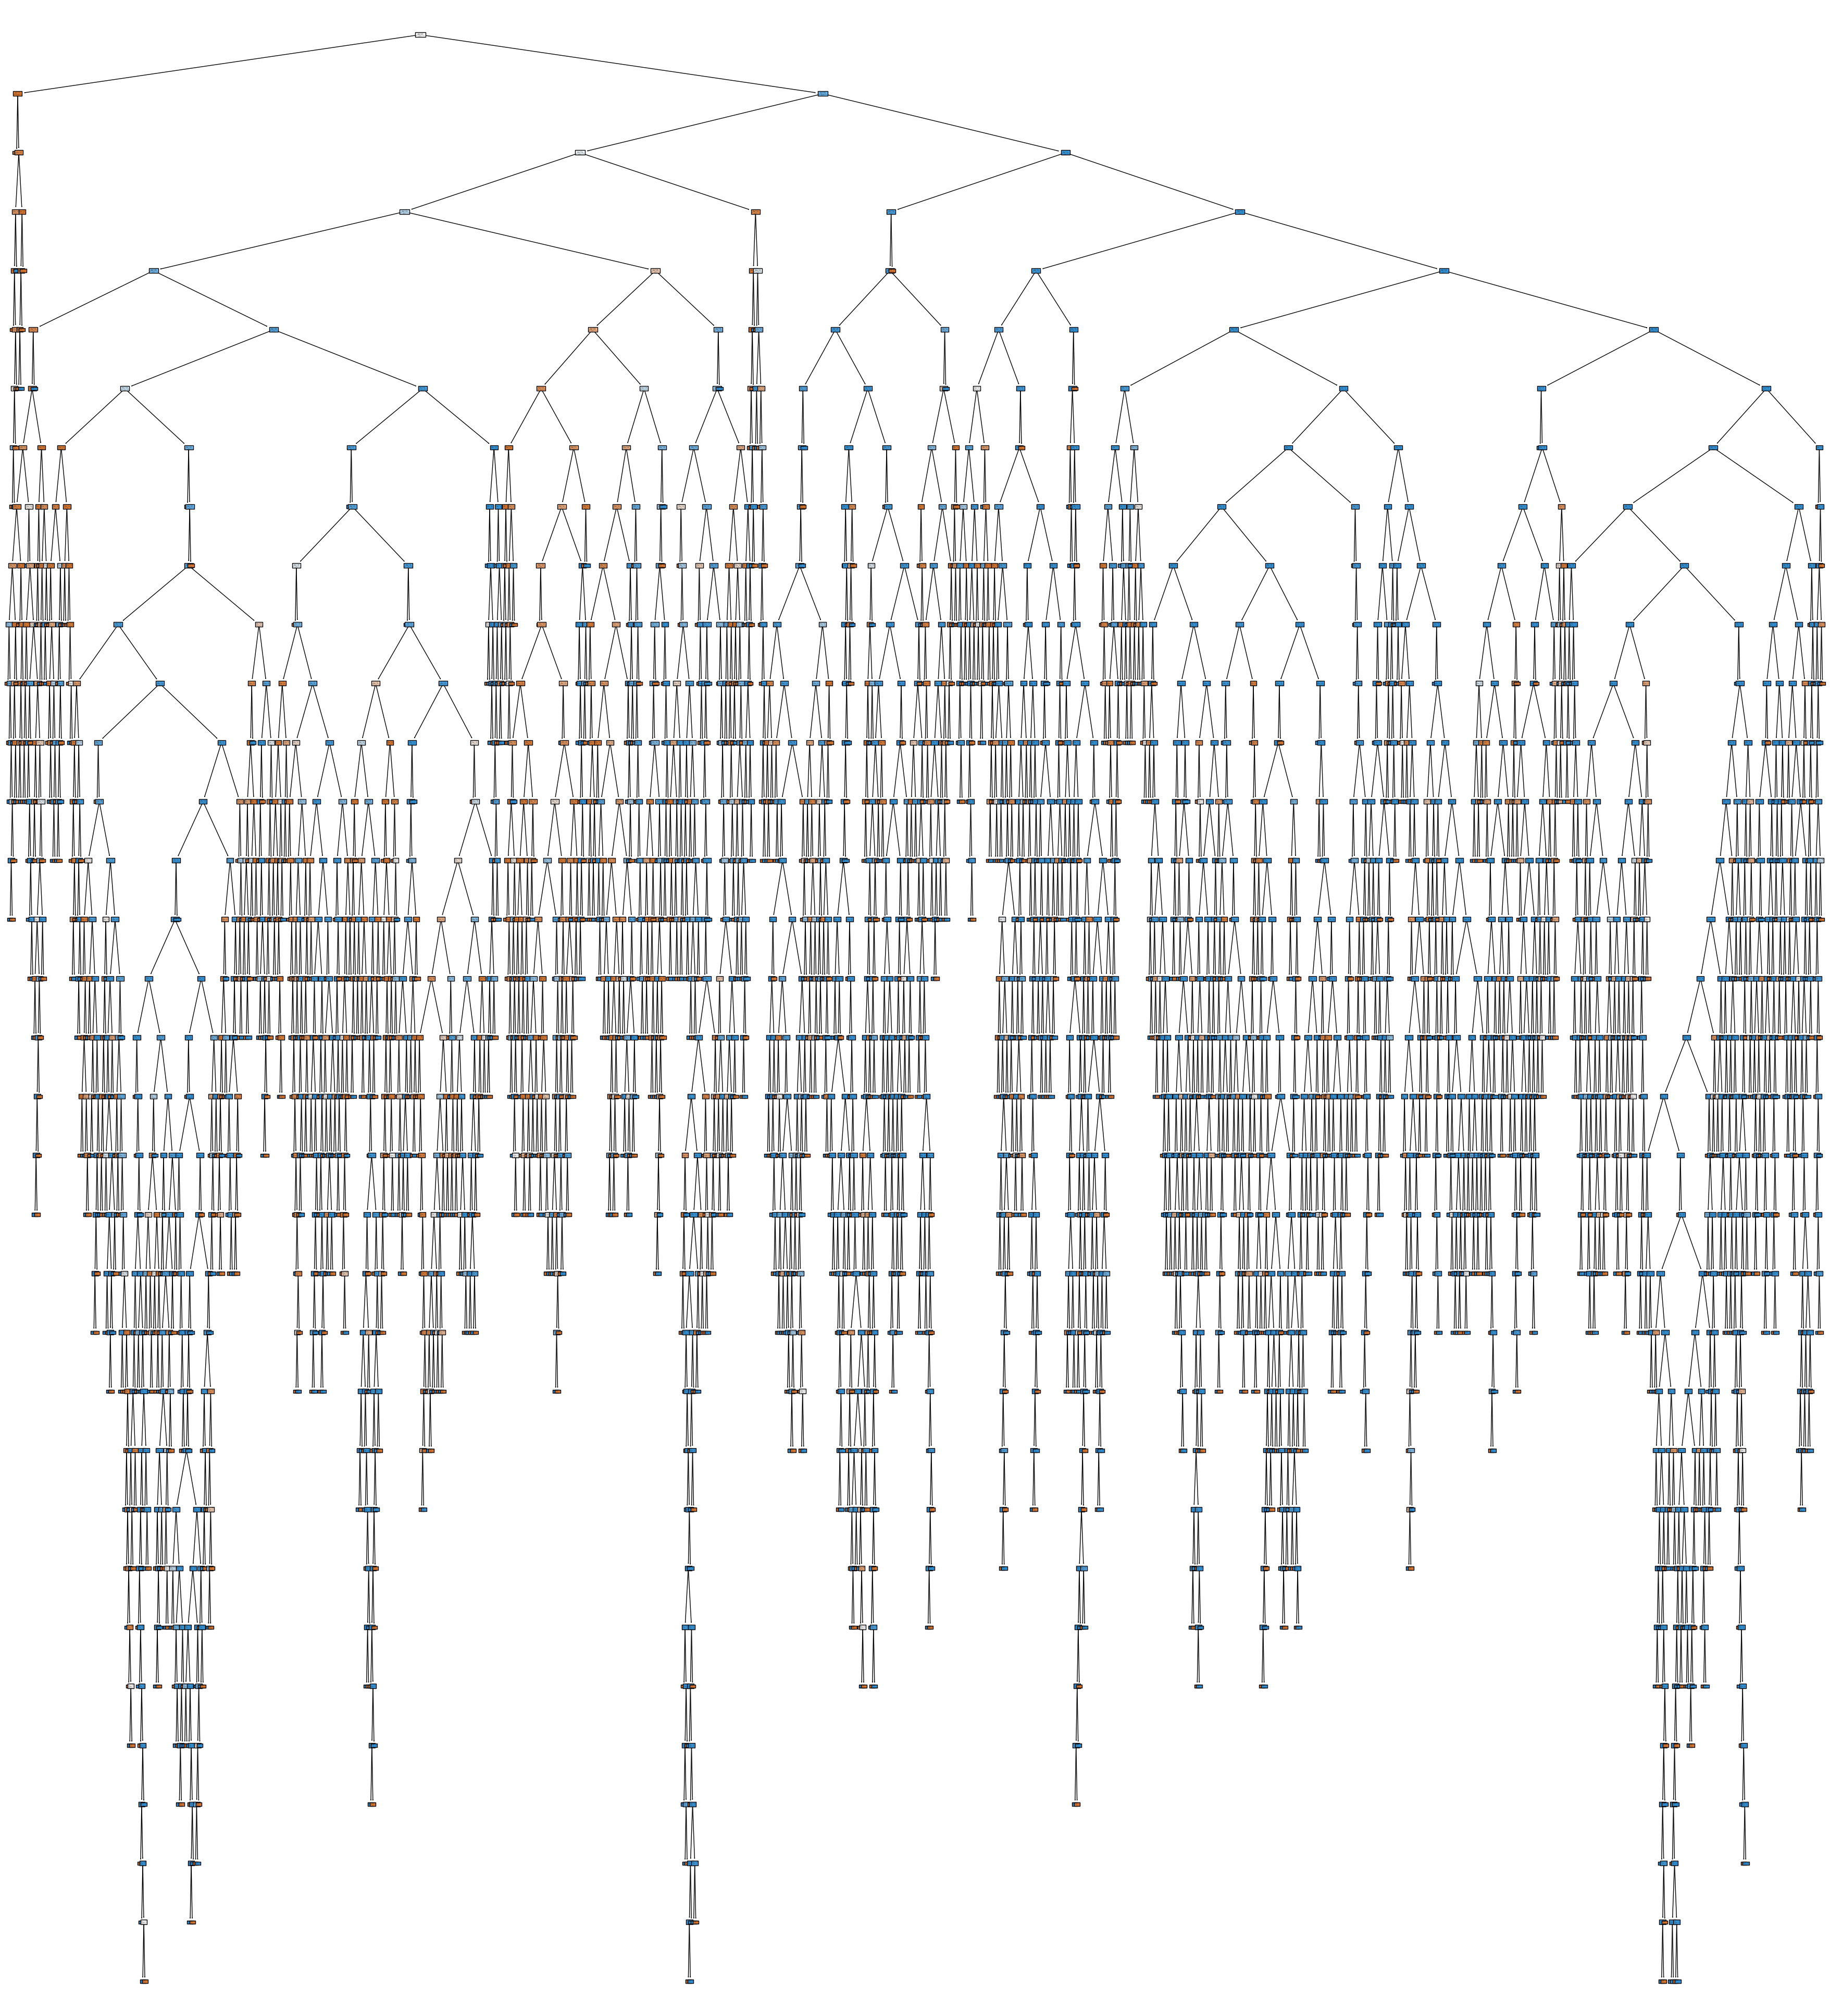

In [62]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(decisiontree,
                #feature_name=x_train,
                class_names=['0','1'],
                filled=True)

In [63]:
train_pred=decisiontree.predict(x_train_os)
y_test_pred=decisiontree.predict(x_test)

In [64]:
y_pred=[ 0 if x < 0.50 else 1 for x in y_test_pred]

In [65]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442871
           1       1.00      1.00      1.00    442871

    accuracy                           1.00    885742
   macro avg       1.00      1.00      1.00    885742
weighted avg       1.00      1.00      1.00    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.52      0.60      0.56       441

    accuracy                           1.00    111144
   macro avg       0.76      0.80      0.78    111144
weighted avg       1.00      1.00      1.00    111144



In [66]:
des=accuracy_score(y_test,y_pred)
des

0.9962391132224862

In [67]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5590717299578061

In [68]:
roc_auc_score(y_test,y_test_pred)

0.7993605000964462

In [69]:
recall_score(y_test, y_pred)

0.6009070294784581

In [70]:
precision_score(y_test, y_pred)

0.5226824457593688

In [71]:
confusion_matrix(y_test,y_pred)

array([[110461,    242],
       [   176,    265]], dtype=int64)

Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree

### Tune the Hyperparameters using GridSerachCV

In [72]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'criterion': ['entropy'], 
                     'max_depth': [5,6,7,10],  
                     'max_features': ["sqrt", "log2"], 
                     'min_samples_split': [2,5,8,10], 
                     'min_samples_leaf': [1,5,9,11], 
                     'max_leaf_nodes': [5,8,11]}]
 

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on x_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train_os, y_train_os)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [73]:
dt_model = DecisionTreeClassifier(criterion ='entropy',
                                  max_depth = 6 ,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 46)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(x_train, y_train)

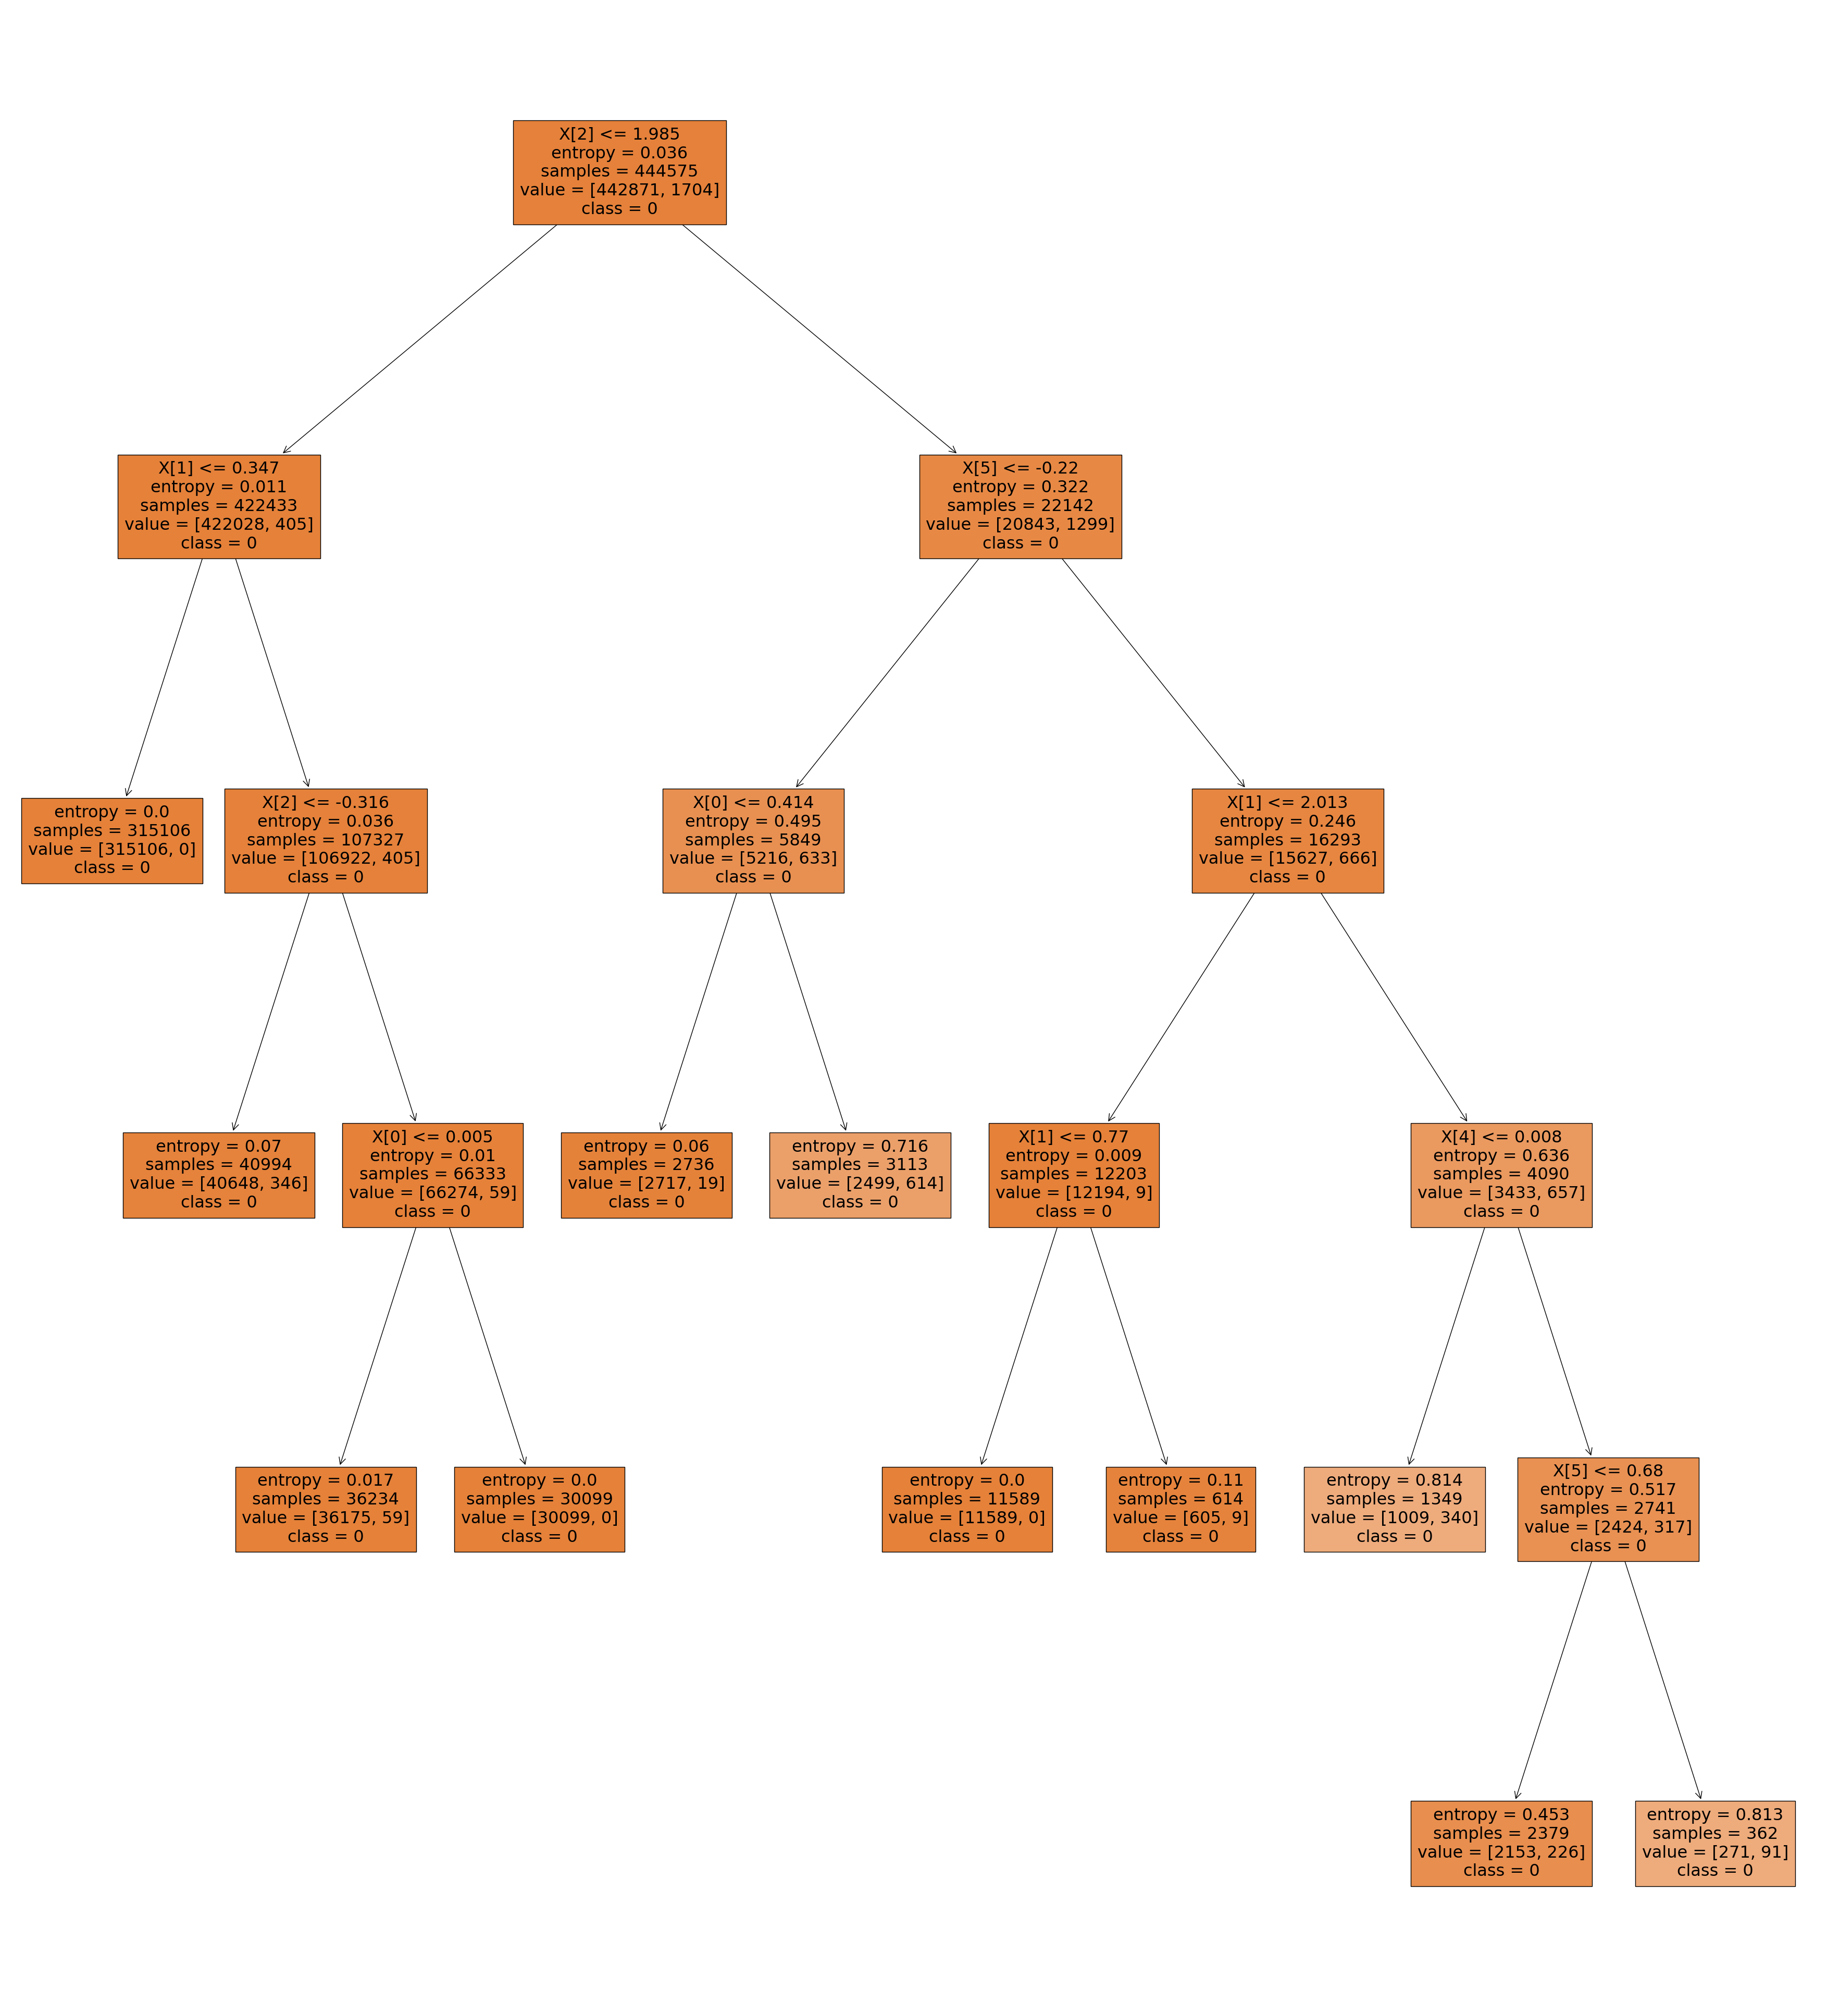

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.rcParams['figure.figsize']=[45,50]
_=tree.plot_tree(dt_model,
                
                class_names=['0','1'],
                filled=True)

In [75]:
train_pred=dt_model.predict(x_train_os)
test_pred=dt_model.predict(x_test)

In [76]:
y_pred1=[ 0 if x < 0.50 else 1 for x in test_pred]

In [77]:
print(classification_report(y_train_os,train_pred))
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    442871
           1       0.00      0.00      0.00    442871

    accuracy                           0.50    885742
   macro avg       0.25      0.50      0.33    885742
weighted avg       0.25      0.50      0.33    885742

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.00      0.00      0.00       441

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



In [78]:
des1=accuracy_score(y_test,test_pred)
des1

0.996032174476355

In [79]:
f1_score(y_test, y_pred1)

0.0

In [80]:
roc_auc_score(y_test,test_pred)

0.5

In [81]:
recall_score(y_test, y_pred1)

0.0

In [82]:
precision_score(y_test, y_pred1)

0.0

In [83]:
confusion_matrix(y_test,y_pred1)

array([[110703,      0],
       [   441,      0]], dtype=int64)

## Ada boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=46)
ada.fit(x_train_os,y_train_os)

AdaBoostClassifier(random_state=46)

In [85]:
test_pred=ada.predict(x_test)
y_pred2=[ 0 if x < 0.50 else 1 for x in test_pred]
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    110703
           1       0.06      0.94      0.12       441

    accuracy                           0.95    111144
   macro avg       0.53      0.94      0.55    111144
weighted avg       1.00      0.95      0.97    111144



In [86]:
ada=accuracy_score(y_test,y_pred2)
ada

0.9458360325343699

In [87]:
f1_score(y_test, y_pred2)

0.12091121495327103

In [88]:
roc_auc_score(y_test,test_pred)

0.9423198346301477

In [89]:
cohen_kappa_score(y_test, y_pred2)

0.11433550315726981

In [90]:
recall_score(y_test, y_pred2)

0.9387755102040817

In [91]:
precision_score(y_test, y_pred2)

0.06461682534727642

In [92]:
confusion_matrix(y_test,y_pred2)

array([[104710,   5993],
       [    27,    414]], dtype=int64)

## Gradient Boosting

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gboost=GradientBoostingClassifier(n_estimators=150,max_depth=10,random_state=46)
gboost.fit(x_train_os,y_train_os)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=46)

In [94]:
test_pred=gboost.predict(x_test)
y_pred3=[ 0 if x < 0.50 else 1 for x in test_pred]

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110703
           1       0.53      0.65      0.58       441

    accuracy                           1.00    111144
   macro avg       0.76      0.82      0.79    111144
weighted avg       1.00      1.00      1.00    111144



In [95]:
gboost=accuracy_score(y_test,y_pred3)
gboost

0.9963020945800043

In [96]:
confusion_matrix(y_test,y_pred3)

array([[110447,    256],
       [   155,    286]], dtype=int64)

### 